In [1]:
%matplotlib inline
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import xarray as xr
import climlab
#from climlab import constants as const
import scipy

In [2]:
# enter albedo data points, keep the southern hemisphere and northern hemisphere locations symmetric
albedo_data = np.array([[-90, 0.9], 
                       [-60, 0.7], 
                       [-15, 0.3],
                       [0, 0.25], 
                       [15, 0.3], 
                       [60, 0.7], 
                       [90, 0.9]])

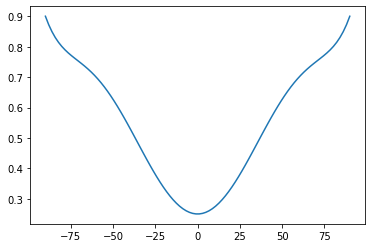

In [3]:
albedo_smoothed = scipy.interpolate.lagrange(albedo_data[:,0], albedo_data[:,1])
albedo_smoothed_paras = np.asarray(albedo_smoothed)
latitudes = np.linspace(-90, 90, num=94)
plt.plot(latitudes, albedo_smoothed(latitudes))

Integrating for 900 steps, 3652.4220000000005 days, or 10 years.
Total elapsed time is 9.999999999999863 years.


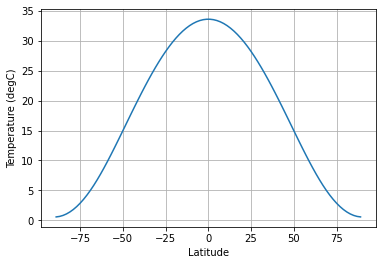

In [4]:
model = climlab.EBM_annual(name='EBM', A=210, B=2, D=0.6, a0=albedo_smoothed_paras[6], a1 = albedo_smoothed_paras[5],
                           a2 = albedo_smoothed_paras[4], a3 = albedo_smoothed_paras[3], a4 = albedo_smoothed_paras[2],
                           a5 = albedo_smoothed_paras[1], a6=albedo_smoothed_paras[0])
model.integrate_years(10)

fig,ax = plt.subplots()
ax.plot(model.lat, model.Ts)
ax.set_ylabel('Temperature (degC)')
ax.set_xlabel('Latitude'); ax.grid();
